In [2]:
from IPython.display import Image
import pandas as pd
%matplotlib inline
from sklearn import preprocessing
import SchemDraw
import SchemDraw.elements as e
import pandapower as pp
import pandapower.shortcircuit as sc
import numpy as np
import pvlib

<font size="6" color='red'>Diagram of the Village</font>

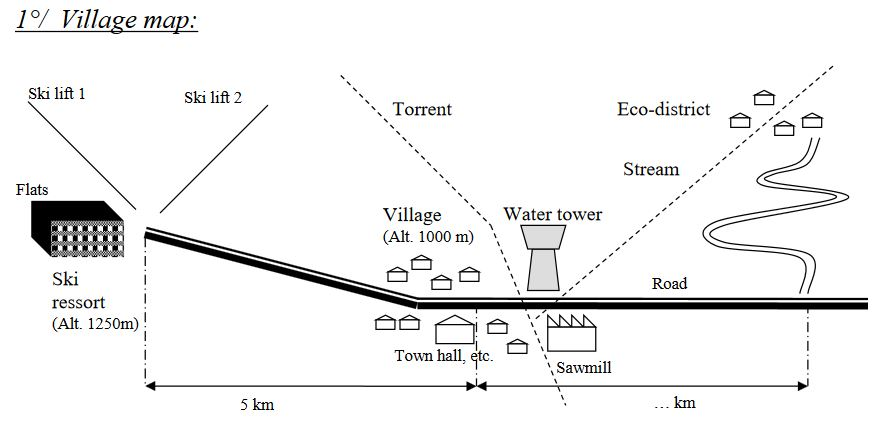

In [3]:
Image(filename='data/design_village.jpg') 

<font size="6" color='red'>General Parameters</font>

<font size="5" color='blue'>Geographical Data</font>

In [4]:
#data from the zone
latitude, longitude, name, altitude, timezone = (45.1996958, 5.5609121, 'Autrans', 1213, ' UTC+01:00')

<font size="5" color='blue'>Period to be analyzed</font>

For the analysis of the current project a 1 year period from 1st January 0:00 to 31 December 11 p.m of 2010 will be considered with data from each hour of the period

In [5]:
rng = pd.date_range(start="1/1/2010", end="2010-12-31 23:00:00", freq="H")
#rng = rng.tz_localize(timezone)

<font size="5" color='blue'>Lines</font>

In [6]:
#line values

overhead_line = {
    "lenght(km)": 8,
    "rated voltage(kV)": 20,
    "cross section(mm2)": 150,
    "short cirucuit power available: at substation(kV),(MVA)":((63,20),500)
}

ski_resort_line = {
    "lenght(km)": 5
}

<font size="5" color='blue'>Power consumption per unit</font>

In [7]:
#power consumption per unit

power = {
    "ski-resort":{
        "lifts(kW)": 75,
        "# of lifts": 2,
        "subscribers(kVA)":3,
        "# of subscribers": 15 
    },
    
    "village":{
        "subscribers(1)(kVA)": 6,
        "# of subscribers(1)": 180,
        "subscribers(2)(kVA)": 9,
        "# of subscribers(2)": 250,
        "subscribers(3)(kVA)": 12,
        "# of subscribers(3)": 100,
        "lighting and tower(kVA)": 36,
        "sawmill(kVA)": 36
    },
    
    "eco-distrcit":{
        "subscribers(1)(kVA)": 6,
        "# of subscribers(1)": 5,
        "subscribers(2)(kVA)": 9,
        "# of subscribers(2)": 12,
        "subscribers(3)(kVA)": 3,
        "# of subscribers(3)": 12
    }
}

<font size="5" color='blue'>Power factor per unit</font>

In [8]:
#power factor per unit

pf = {
    "ski-resort":{
        "lifts(kW)": .8,
        "subscribers(kVA)":.8,
    },
    
    "village":{
        "subscribers(1)(kVA)": .8,
        "subscribers(2)(kVA)": .8,
        "subscribers(3)(kVA)": .8,
        "lighting and tower(kVA)": .8,
        "sawmill(kVA)": .8
    },
    
    "eco-distrcit":{
        "subscribers(1)(kVA)": .8,
        "subscribers(2)(kVA)": .8,
        "subscribers(3)(kVA)": .8
    }
}

<font size="6" color='red'>Tempreature of the Village</font>

The outdoor temperature curve of the village can be measured by a small weather station.
The temperature curve is given in ° C for the period to be analyzed

<font size="5" color='brown'>Data</font>

In [9]:
#reading of temperature data from files

temperature_village = pd.read_csv('data/Temperature_2010_1h.txt', sep=" ", header=None)
temperature_village.columns = ["Temperature(Cº)"]
temperature_village.set_index(rng,inplace=True)
temperature_village.head()

,Temperature(Cº)
2010-01-01 00:00:00,2.41726
2010-01-01 01:00:00,1.91726
2010-01-01 02:00:00,1.41726
2010-01-01 03:00:00,0.91726
2010-01-01 04:00:00,0.51726


<font size="5" color='orange'>Temperature Plotting</font>

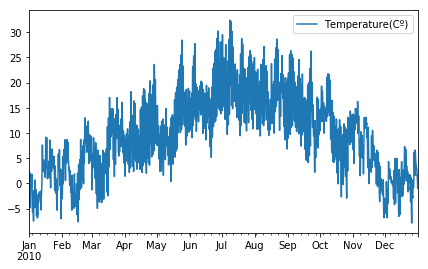

In [10]:
#plotting of temperature data

temperature_village.plot()

<font size="5" color='pink'>Temperature Data Analysis</font>

In [11]:
#Analysis of temperature data

temperature_village.describe()

,Temperature(Cº)
count,8760.000000
mean,9.472871
std,7.786131
min,-7.882740
25%,3.417260
50%,9.617260
75%,15.067260
max,32.417260


<font size="6" color='red'>Ski-Resort</font>

The ski-resort is located at 5km from the village

<font size="5" color='blue'>Power Calculation</font>

In [12]:
#computation of power consumption

ski_resort_df_data = {
    "lifts" : power["ski-resort"]["lifts(kW)"]*power["ski-resort"]["# of lifts"]/pf["ski-resort"]["lifts(kW)"],
    "subscribers" : power["ski-resort"]["subscribers(kVA)"]*power["ski-resort"]["# of subscribers"]/pf["ski-resort"]["subscribers(kVA)"]
}

ski_resort_df = pd.DataFrame(list(ski_resort_df_data.items()), columns=['Unit', 'Consumption(kVA)'])
ski_resort_df.loc['Total'] = pd.Series(ski_resort_df['Consumption(kVA)'].sum(), index = ['Consumption(kVA)'])

ski_resort_df

,Unit,Consumption(kVA)
0,lifts,187.50
1,subscribers,56.25
Total,NaN,243.75


<font size="5" color='brown'>Load Data</font>

In [13]:
#reading of load data from files

load_ski_station = pd.read_csv('data/P_ski station_2010_1h.txt', sep=" ", header=None)
load_ski_station.columns = ["Consumption(W)"]
load_ski_station.set_index(rng,inplace=True)
load_ski_station.head()

,Consumption(W)
2010-01-01 00:00:00,48155.106216
2010-01-01 01:00:00,54728.584096
2010-01-01 02:00:00,56447.570598
2010-01-01 03:00:00,57650.476372
2010-01-01 04:00:00,67961.215419


<font size="5" color='orange'>Ski-Resort Load</font>

The load of the ski-resort during the year has two clear different defined behaviors

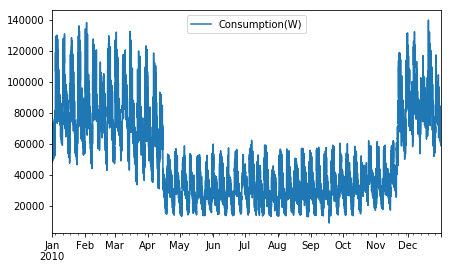

In [14]:
#plotting of load data

load_ski_station.plot()

<font size="5" color='pink'>Load Data Analysis</font>

In [15]:
#Analysis of temperature data

load_ski_station.describe()

,Consumption(W)
count,8760.000000
mean,51549.230303
std,28273.743989
min,8695.861233
25%,28736.262609
50%,43285.470631
75%,72454.855401
max,139776.037757


<font size="5" color='orange'>Ski-Resort Load vs Temperature</font>

The load of the ski-resort different behaviors can be explained by the behavior of temperature

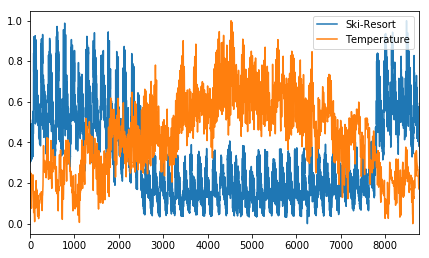

In [16]:
#comparison of load vs temperature normalized

ski_resort_temperature_merge = pd.merge(load_ski_station, temperature_village, left_index=True, right_index=True)
ski_resort_temperature_array = ski_resort_temperature_merge.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
ski_resort_temperature_scaled = min_max_scaler.fit_transform(ski_resort_temperature_array)
ski_resort_temperature_normalized = pd.DataFrame(ski_resort_temperature_scaled, columns=["Ski-Resort","Temperature"])
ski_resort_temperature_normalized.plot()

<font size="5" color='green'>Ski-Resort First Period</font>

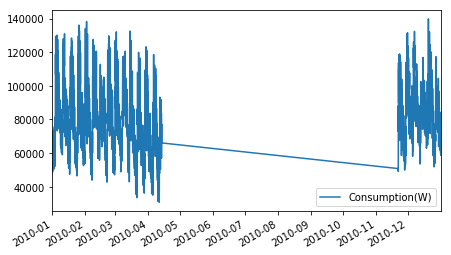

In [17]:
pd.concat([load_ski_station["2010-01-01":"2010-04-13"],load_ski_station["2010-11-22":"2010-12-31"]]).plot()

<font size="5" color='brown'>Ski-Resort First Period Data Analysis</font>

In [18]:
pd.concat([load_ski_station["2010-01-01":"2010-04-13"],load_ski_station["2010-11-22":"2010-12-31"]]).describe()

,Consumption(W)
count,3432.000000
mean,80708.708003
std,20775.071961
min,30794.803298
25%,64460.791083
50%,79429.168233
75%,94353.848599
max,139776.037757


<font size="5" color='green'>Ski-Resort Second Period</font>

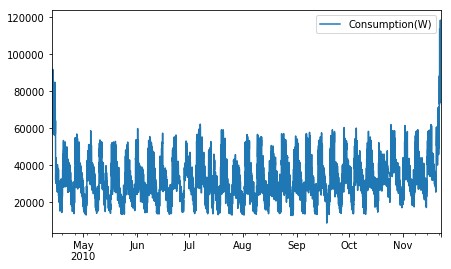

In [19]:
load_ski_station["2010-04-13":"2010-11-22"].plot()

<font size="5" color='brown'>Ski-Resort Second Period Data Analysis</font>

In [20]:
load_ski_station["2010-04-13":"2010-11-22"].describe()

,Consumption(W)
count,5376.000000
mean,33201.897819
std,12569.665885
min,8695.861233
25%,23523.058713
50%,31973.970690
75%,40864.088620
max,118282.418513


<font size="6" color='red'>Village</font>

The village is the main part of the analysis and is the contact to the grid.

<font size="5" color='blue'>Power Calculation</font>

In [21]:
village_df_data = {
    "subscribers(1)" : power["village"]["subscribers(1)(kVA)"]*power["village"]["# of subscribers(1)"]/pf["village"]["subscribers(1)(kVA)"],
    "subscribers(2)" : power["village"]["subscribers(2)(kVA)"]*power["village"]["# of subscribers(2)"]/pf["village"]["subscribers(2)(kVA)"],
    "subscribers(3)" : power["village"]["subscribers(3)(kVA)"]*power["village"]["# of subscribers(3)"]/pf["village"]["subscribers(3)(kVA)"],
    "lighting and tower" : power["village"]["lighting and tower(kVA)"]/pf["village"]["lighting and tower(kVA)"],
    "sawmill" : power["village"]["sawmill(kVA)"]/pf["village"]["sawmill(kVA)"]
}

village_df = pd.DataFrame(list(village_df_data.items()), columns=['Unit', 'Consumption(kVA)'])
village_df.loc['Total'] = pd.Series(village_df['Consumption(kVA)'].sum(), index = ['Consumption(kVA)'])

village_df

,Unit,Consumption(kVA)
0,subscribers(1),1350.0
1,subscribers(2),2812.5
2,subscribers(3),1500.0
3,lighting and tower,45.0
4,sawmill,45.0
Total,NaN,5752.5


<font size="5" color='brown'>Load Data</font>

In [22]:
load_village = pd.read_csv('data/P_village_2010_1h.txt', sep=" ", header=None)
load_village.columns = ["Consumption(W)"]
load_village.set_index(rng,inplace=True)
load_village.head()

,Consumption(W)
2010-01-01 00:00:00,9.405309e+05
2010-01-01 01:00:00,1.142462e+06
2010-01-01 02:00:00,1.030934e+06
2010-01-01 03:00:00,9.945415e+05
2010-01-01 04:00:00,8.827031e+05


<font size="5" color='orange'>Village Load</font>

The load of the village during the year has three clear different defined behaviors

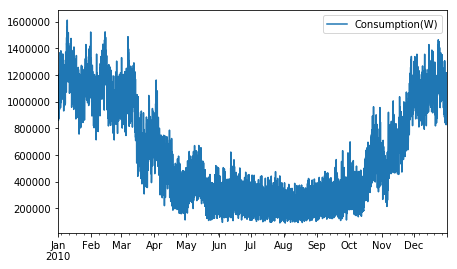

In [23]:
load_village.plot()

<font size="5" color='pink'>Village Load Data Analysis</font>

In [24]:
load_village.describe()

,Consumption(W)
count,8.760000e+03
mean,5.791802e+05
std,3.818494e+05
min,8.969528e+04
25%,2.361388e+05
50%,4.392702e+05
75%,9.601394e+05
max,1.610646e+06


<font size="5" color='orange'>Village Load vs Temperature</font>

The load of the village different behaviors can be explained by the behavior of temperature

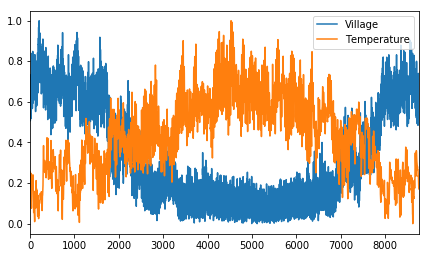

In [25]:
#comparison of load vs temperature normalized

village_temperature_merge = pd.merge(load_village, temperature_village, left_index=True, right_index=True)
village_temperature_array = village_temperature_merge.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
village_temperature_scaled = min_max_scaler.fit_transform(village_temperature_array)
village_temperature_normalized = pd.DataFrame(village_temperature_scaled, columns=["Village","Temperature"])
village_temperature_normalized.plot()

<font size="5" color='green'>Village First Period</font>

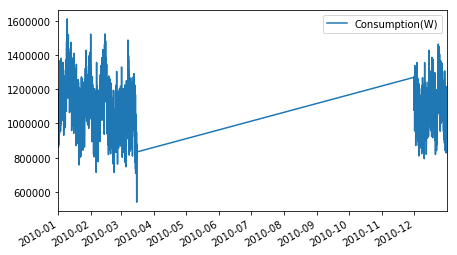

In [26]:
pd.concat([load_village["2010-01-01":"2010-03-15"], load_village["2010-12-01":"2010-12-31"]]).plot()

<font size="5" color='brown'>Village First Period Data Analysis</font>

<font size="5" color='brown'>Load Data</font>

In [27]:
pd.concat([load_village["2010-01-01":"2010-03-15"], load_village["2010-12-01":"2010-12-31"]]).describe()

,Consumption(W)
count,2.520000e+03
mean,1.089628e+06
std,1.390430e+05
min,5.394498e+05
25%,9.945415e+05
50%,1.089928e+06
75%,1.183138e+06
max,1.610646e+06


<font size="5" color='green'>Village Second Period</font>

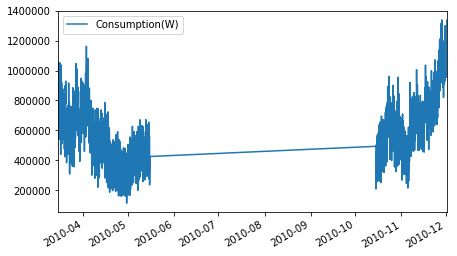

In [28]:
pd.concat([load_village["2010-03-15":"2010-05-15"], load_village["2010-10-15":"2010-12-01"]]).plot()

<font size="5" color='brown'>Village Second Period Data Analysis</font>

In [29]:
pd.concat([load_village["2010-03-15":"2010-05-15"], load_village["2010-10-15":"2010-12-01"]]).describe()

,Consumption(W)
count,2.640000e+03
mean,5.706685e+05
std,2.211654e+05
min,1.130648e+05
25%,3.985118e+05
50%,5.533541e+05
75%,7.156493e+05
max,1.338589e+06


<font size="5" color='green'>Village Third Period</font>

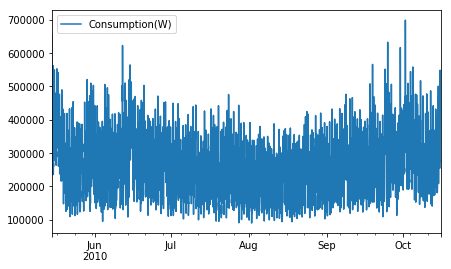

In [30]:
load_village["2010-05-15":"2010-10-15"].plot()

<font size="5" color='brown'>Village Third Period Data Analysis</font>

In [31]:
load_village["2010-05-15":"2010-10-15"].describe()

,Consumption(W)
count,3696.000000
mean,239693.014129
std,87819.254782
min,89695.280576
25%,172058.451273
50%,219747.392092
75%,290723.770238
max,698303.581441


<font size="6" color='red'>Diagram of the system</font>

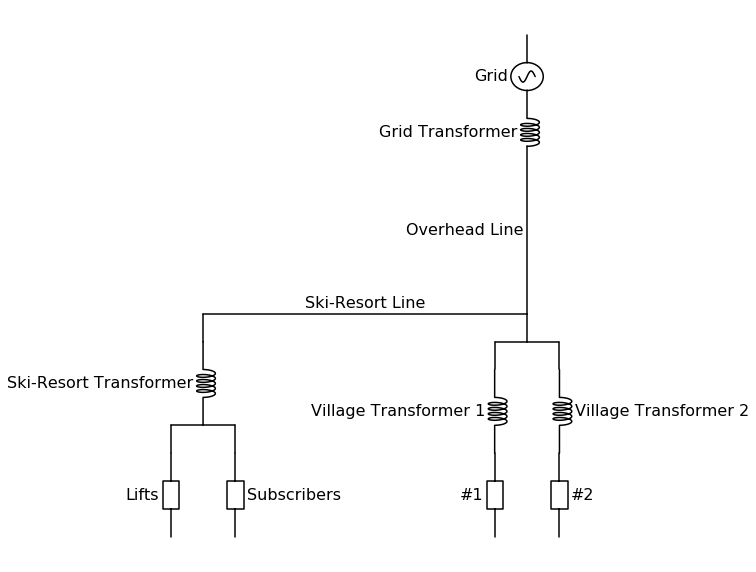

In [32]:
d = SchemDraw.Drawing()

#overhead line elements
V1 = d.add(e.SOURCE_SIN, d='down', label='Grid')
d.add(e.INDUCTOR2, label='Grid Transformer', l=1)
d.add(e.LINE, label="Overhead Line", l=6)

d.push() #save point 1 to return

#village elements
d.add(e.LINE, d='down', l=1)
d.push() #save point 2 to return
d.add(e.LINE, d='left', l=1)
d.add(e.LINE, d='down', l=1)
d.add(e.INDUCTOR2, label='Village Transformer 1', l=3)
d.add(e.RBOX, label='#1')
d.pop() #return to the point 2
d.add(e.LINE, d='right', l=1)
d.add(e.LINE, d='down', l=1)
d.add(e.INDUCTOR2, botlabel='Village Transformer 2', l=3)
d.add(e.RBOX, botlabel='#2')



d.pop() #return to the point 1

#ski resort elements
d.add(e.LINE, d='left', label="Ski-Resort Line", l=10)
d.add(e.LINE, d='down', l=1)
d.add(e.INDUCTOR2, label='Ski-Resort Transformer', l=3)
d.push() #save point 4 to return
d.add(e.LINE, d='left', l=1)
d.add(e.LINE, d='down', l=1)
d.add(e.RBOX, label='Lifts')
d.pop() #return to the point 4
d.add(e.LINE, d='right', l=1)
d.add(e.LINE, d='down', l=1)
d.add(e.RBOX, botlabel='Subscribers')


d.draw()

d.save('data/line_diagram.eps')

<font size="6" color='red'>Simulation of the Network</font>

In [33]:
net = pp.create_empty_network(name="village")

## elements(overhead line)
#buses
bus_1 = pp.create_bus(net, vn_kv=63, name="Bus_1")
bus_2 = pp.create_bus(net, vn_kv=20, name="Bus_2")
bus_3 = pp.create_bus(net, vn_kv=20, name="Bus_3")
#grid
pp.create_ext_grid(net, bus=bus_1, vm_pu=1.0, name="Grid Connection")
#transformer
pp.create_transformer(net, hv_bus=bus_1, lv_bus=bus_2, std_type="25 MVA 110/20 kV", name="Transformer Grid")
#line
pp.create_line(net, from_bus=bus_2, to_bus=bus_3, length_km=overhead_line["lenght(km)"], std_type="NA2XS2Y 1x150 RM/25 12/20 kV", name="Overhead line")

## elements(ski resort)
#buses
bus_4 = pp.create_bus(net, vn_kv=20, name="Bus_4")
bus_5 = pp.create_bus(net, vn_kv=20, name="Bus_5")
#line
pp.create_line(net, from_bus=bus_3, to_bus=bus_4, length_km=ski_resort_line["lenght(km)"], std_type="NA2XS2Y 1x150 RM/25 12/20 kV", name="Overhead line")
#transformer
#pp.create_transformer(net, hv_bus=bus_4, lv_bus=bus_5, std_type="", name="Transformer Ski-Resort")
#loads
pp.create_load(net, bus=bus_5, p_mw=0.15, q_mvar=0, name="Lifts")
pp.create_load(net, bus=bus_5, p_mw=0.045, q_mvar=0, name="Susbcribers")

#loads at the ski resort
#pp.create_load(net, bus=bus_7, p_mw=0.100, q_mvar=0.05, name="Load_1")
#pp.create_load(net, bus=bus_8, p_mw=0.100, q_mvar=0.05, name="Load_2")

#loads at the village

1

<font size="6" color='red'>Economic Analysis</font>

In [34]:
interest_rate = .08
years = 20
np.pv(interest_rate, years, 100)

-981.8147407449294

<font size="6" color='red'>Eco-District</font>

The village is the main part of the analysis and is the contact to the grid.

<font size="5" color='blue'>Power Calculation</font>

In [35]:
eco_district_df_data = {
    "subscribers(1)" : power["eco-distrcit"]["subscribers(1)(kVA)"]*power["village"]["# of subscribers(1)"]/pf["eco-distrcit"]["subscribers(1)(kVA)"],
    "subscribers(2)" : power["eco-distrcit"]["subscribers(2)(kVA)"]*power["village"]["# of subscribers(2)"]/pf["eco-distrcit"]["subscribers(2)(kVA)"],
    "subscribers(3)" : power["eco-distrcit"]["subscribers(3)(kVA)"]*power["village"]["# of subscribers(3)"]/pf["eco-distrcit"]["subscribers(3)(kVA)"]
}

eco_district_df = pd.DataFrame(list(eco_district_df_data.items()), columns=['Unit', 'Consumption(kVA)'])
eco_district_df.loc['Total'] = pd.Series(eco_district_df['Consumption(kVA)'].sum(), index = ['Consumption(kVA)'])

eco_district_df

,Unit,Consumption(kVA)
0,subscribers(1),1350.0
1,subscribers(2),2812.5
2,subscribers(3),375.0
Total,NaN,4537.5


<font size="5" color='brown'>Load Data</font>

In [36]:
load_eco_district = pd.read_csv('data/P_ecodistrict_2010_1h.txt', sep=" ", header=None)
load_eco_district.columns = ["Consumption(W)"]
load_eco_district.set_index(rng,inplace=True)
load_eco_district.head()

,Consumption(W)
2010-01-01 00:00:00,34297.910448
2010-01-01 01:00:00,44925.218326
2010-01-01 02:00:00,38253.186827
2010-01-01 03:00:00,37285.680931
2010-01-01 04:00:00,31724.993885


<font size="5" color='orange'>Eco-District Load</font>

The load of the eco-district during the year has three clear different defined behaviors

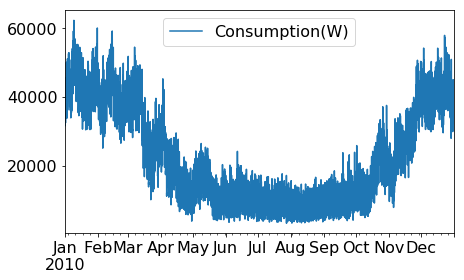

In [37]:
load_eco_district.plot()

<font size="5" color='pink'>Eco-District Load Data Analysis</font>

In [38]:
load_eco_district.describe()

,Consumption(W)
count,8760.000000
mean,21768.853197
std,14411.781505
min,3317.476818
25%,8846.556431
50%,16511.138745
75%,35901.399294
max,62234.142712


<font size="5" color='orange'>Eco-District Load vs Temperature</font>

The load of the eco-district different behaviors can be explained by the behavior of temperature

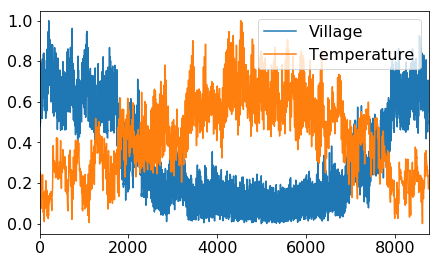

In [39]:
#comparison of load vs temperature normalized

eco_district_temperature_merge = pd.merge(load_eco_district, temperature_village, left_index=True, right_index=True)
eco_district_temperature_array = eco_district_temperature_merge.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
eco_district_temperature_scaled = min_max_scaler.fit_transform(eco_district_temperature_array)
eco_district_temperature_normalized = pd.DataFrame(eco_district_temperature_scaled, columns=["Village","Temperature"])
eco_district_temperature_normalized.plot()

<font size="5" color='green'>Eco-District First Period</font>

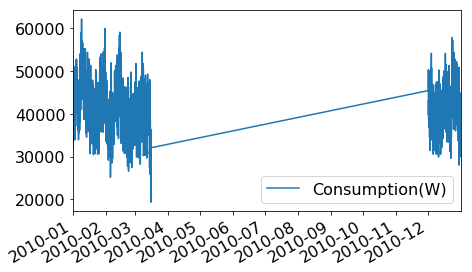

In [40]:
pd.concat([load_eco_district["2010-01-01":"2010-03-15"], load_eco_district["2010-12-01":"2010-12-31"]]).plot()

<font size="5" color='brown'>Eco-District First Period Data Analysis</font>

In [41]:
pd.concat([load_eco_district["2010-01-01":"2010-03-15"], load_eco_district["2010-12-01":"2010-12-31"]]).describe()

,Consumption(W)
count,2520.000000
mean,40994.879393
std,5518.509287
min,19290.964760
25%,37207.066055
50%,40999.010487
75%,44610.732776
max,62234.142712


<font size="5" color='green'>Eco-District Second Period</font>

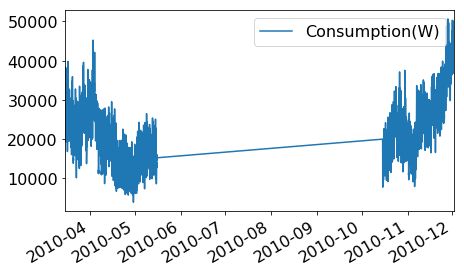

In [42]:
pd.concat([load_eco_district["2010-03-15":"2010-05-15"], load_eco_district["2010-10-15":"2010-12-01"]]).plot()

<font size="5" color='brown'>Eco-District Second Period Data Analysis</font>

In [43]:
pd.concat([load_eco_district["2010-03-15":"2010-05-15"], load_eco_district["2010-10-15":"2010-12-01"]]).describe()

,Consumption(W)
count,2640.000000
mean,21421.926736
std,8362.978063
min,3934.282212
25%,14918.935723
50%,20674.739664
75%,26855.227292
max,50647.746407


<font size="5" color='green'>Eco-District Third Period</font>

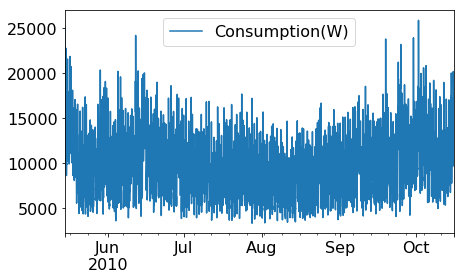

In [44]:
load_eco_district["2010-05-15":"2010-10-15"].plot()

<font size="5" color='brown'>Eco-District Third Period Data Analysis</font>

In [45]:
load_eco_district["2010-05-15":"2010-10-15"].describe()

,Consumption(W)
count,3696.000000
mean,9003.872931
std,3337.202779
min,3317.476818
25%,6444.352773
50%,8307.160662
75%,10912.762169
max,25868.391291


<font size="6" color='yellow'>PV production</font>

<font size="5" color='blue'>Production Calculation</font>

In [46]:
# get the module and inverter specifications from SAM
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

#temperature
temp_series = temperature_village.squeeze()
#wind speed
wind_list = [0] * 8760
wind_df = pd.DataFrame(wind_list)
wind_df.columns = ["Wind Speed"]
wind_df.set_index(rng,inplace=True)
wind_series = wind_df.squeeze()

#calculations
system = {'module': module, 'inverter': inverter, 'surface_azimuth': 180}
times = rng
system['surface_tilt'] = latitude
solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
dni_extra = pvlib.irradiance.get_extra_radiation(times)
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)
cs = pvlib.clearsky.ineichen(solpos['apparent_zenith'], am_abs, tl,
                           dni_extra=dni_extra, altitude=altitude)
aoi = pvlib.irradiance.aoi(system['surface_tilt'], system['surface_azimuth'],
                           solpos['apparent_zenith'], solpos['azimuth'])
total_irrad = pvlib.irradiance.get_total_irradiance(system['surface_tilt'],
                                                       system['surface_azimuth'],
                                                       solpos['apparent_zenith'],
                                                       solpos['azimuth'],
                                                       cs['dni'], cs['ghi'], cs['dhi'],
                                                       dni_extra=dni_extra,
                                                       model='haydavies')
temps = pvlib.pvsystem.sapm_celltemp(total_irrad['poa_global'],
                                        wind_series, temp_series)
effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(
total_irrad['poa_direct'], total_irrad['poa_diffuse'],
       am_abs, aoi, module)
dc = pvlib.pvsystem.sapm(effective_irradiance, temps['temp_cell'], module)
ac = pvlib.pvsystem.snlinverter(dc['v_mp'], dc['p_mp'], inverter)
annual_energy = ac.sum()

#dataframe
production = pd.DataFrame({'list':ac.values})
production.columns = ["Production(W)"]
production.set_index(rng,inplace=True)
production.head()

,Production(W)
2010-01-01 00:00:00,-0.02
2010-01-01 01:00:00,-0.02
2010-01-01 02:00:00,-0.02
2010-01-01 03:00:00,-0.02
2010-01-01 04:00:00,-0.02


In [47]:
production['Production(W)'].sum()

469470.4794933579

<font size="5" color='orange'>Production per year</font>

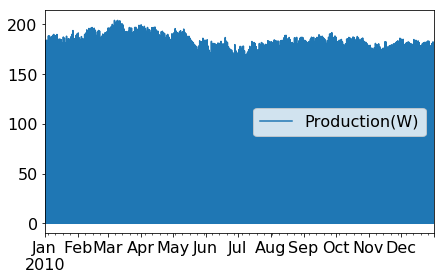

In [48]:
production.plot()

<font size="5" color='orange'>Production per day</font>

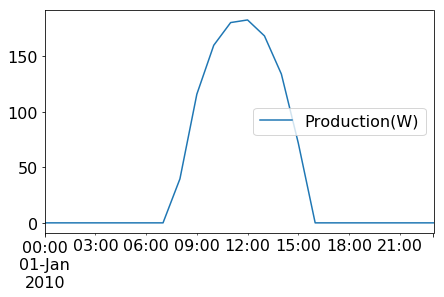

In [49]:
production["2010-01-01":"2010-01-01"].plot()

In [50]:
import os
from omegalpes.general.time import TimeUnit
#from omegalpes.general.utils.input_data import select_csv_file_between_dates
from omegalpes.energy.units.consumption_units import FixedConsumptionUnit, VariableConsumptionUnit
from omegalpes.energy.units.production_units import FixedProductionUnit, VariableProductionUnit
from omegalpes.energy.units.storage_units import StorageUnit
from omegalpes.energy.energy_types import elec
from omegalpes.energy.energy_nodes import EnergyNode
from omegalpes.actor.operator_actors.consumer_producer_actors import Producer
from omegalpes.general.optimisation.model import OptimisationModel
from pulp import LpStatus, PULP_CBC_CMD, GLPK_CMD, COIN_CMD, GUROBI_CMD, GUROBI

work_path = os.getcwd()

time = TimeUnit(periods=24, dt=1, start='01/01/2010 00:00')

load_eco_district_values = load_eco_district['Consumption(W)'].values.tolist()
production_values = production['Production(W)'].values.tolist()
number_of_pv = 300
production_values_new = [i * number_of_pv for i in production_values]

eco_district_unit = FixedConsumptionUnit(time=time, name='eco_district_unit', p=load_eco_district_values[0:24], energy_type=elec)
pv = FixedProductionUnit(time=time, name='pv', p=production_values_new[0:24], energy_type=elec)

grid_production = VariableProductionUnit(time, 'grid_production', energy_type=elec, pmax=50000, e_max=10000000000)
grid_consumption = VariableConsumptionUnit(time, 'grid_consumption', energy_type=elec, e_max=1000000000)

node = EnergyNode(time=time, name='elec_node', energy_type=elec)
node.connect_units(eco_district_unit, pv, grid_consumption, grid_production)

#Producer = Producer(name='Producer', operated_unit_list=[grid_production])

model = OptimisationModel(time=time, name='mountain_village')
model.add_nodes_and_actors(node) 

model.writeLP(work_path + r'\optim_models\mountain_village.lp')
model.solve_and_update(PULP_CBC_CMD(msg=1))

You are studying the period from 2010-01-01 00:00:00 to 2010-01-01 23:00:00
Creating the eco_district_unit.
Creating the pv.
Creating the grid_production.
Creating the grid_consumption.
Creating the elec_node.

--- Adding all variables to the model ---
Adding variable : eco_district_unit_p
Adding variable : eco_district_unit_e_tot
Adding variable : pv_p
Adding variable : pv_e_tot
Adding variable : grid_consumption_p
Adding variable : grid_consumption_e_tot
Adding variable : grid_consumption_u
Adding variable : grid_production_p
Adding variable : grid_production_e_tot
Adding variable : grid_production_u

--- Adding all objectives to the model ---

--- Adding all constraints to the model ---
Adding constraint : elec_node_power_balance , exp = -eco_district_unit_p[t]+pv_p[t]-grid_consumption_p[t]+grid_production_p[t] == 0 for t in time.I
Adding constraint : eco_district_unit_calc_e_tot , exp = eco_district_unit_e_tot == time.DT * lpSum(eco_district_unit_p[t] for t in time.I)
Adding constr

D:\Programs\Anaconda3\lib\site-packages\omegalpes\general\optimisation\model.py:460: UserWarning: The unit elec_node seems to have as parent Autrans which was not declared as parent.
  'parent.'.format(unit.name, parent_name))



 - - - - - UPDATE RESULTS - - - - - 
Updating unit : elec_node
Updating unit : eco_district_unit
	Quantity : p
	Quantity : e_tot
Updating unit : pv
	Quantity : p
	Quantity : e_tot
Updating unit : grid_consumption
	Quantity : p
	Quantity : e_tot
	Quantity : u
Updating unit : grid_production
	Quantity : p
	Quantity : e_tot
	Quantity : u


In [51]:
if LpStatus[model.status] == 'Optimal':
    print("the total consumption from Eco-Dsitrict is {} kWh".format(float(eco_district_unit.e_tot) / 1000))
    print("the total production from PV is {} kWh".format(float(pv.e_tot) / 1000))
    print("the total grid production is {} kWh".format(float(grid_production.e_tot) / 1000))
    print("the total grid consumption {} kWh".format(float(grid_consumption.e_tot) / 1000))    

the total consumption from Eco-Dsitrict is 920.03575 kWh
the total production from PV is 315.96246 kWh
the total grid production is 648.42789 kWh
the total grid consumption 44.354597 kWh


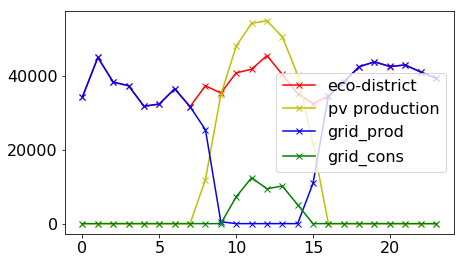

In [52]:
from omegalpes.general.utils.plots import plt, plot_quantity

fig1 = plt.figure(1)
ax1 = plt.axes()
plot_quantity(time, eco_district_unit.p, fig1, ax1, color='r', label='eco-district')
plot_quantity(time, pv.p, fig1, ax1, color='y', label='pv production')
plot_quantity(time, grid_production.p, fig1, ax1, color='b', label='grid_prod')
plot_quantity(time, grid_consumption.p, fig1, ax1, color='g', label='grid_cons')
ax1.legend()

In [53]:
storage = StorageUnit(time, name='storage', ef_is_e0=True)
#storage.minimize_capacity()

node = EnergyNode(time=time, name='elec_node', energy_type=elec)
node.connect_units(eco_district_unit, pv, storage, grid_consumption, grid_production)

#producer = Producer(name='Producer', operated_unit_list=[grid_production])
#producer.minimize_production()

model = OptimisationModel(time=time, name='mountain_village_2')
model.add_nodes_and_actors(node) 

model.writeLP(work_path + r'\optim_models\mountain_village_2.lp')
model.solve_and_update(PULP_CBC_CMD(msg=1))

Creating the storage.
Creating the elec_node.

--- Adding all variables to the model ---
Adding variable : eco_district_unit_p
Adding variable : eco_district_unit_e_tot
Adding variable : pv_p
Adding variable : pv_e_tot
Adding variable : storage_p
Adding variable : storage_e_tot
Adding variable : storage_u
Adding variable : storage_capacity
Adding variable : storage_e
Adding variable : storage_pc
Adding variable : storage_pd
Adding variable : storage_uc
Adding variable : storage_e_f
Adding variable : grid_consumption_p
Adding variable : grid_consumption_e_tot
Adding variable : grid_consumption_u
Adding variable : grid_production_p
Adding variable : grid_production_e_tot
Adding variable : grid_production_u

--- Adding all objectives to the model ---

--- Adding all constraints to the model ---
Adding constraint : elec_node_power_balance , exp = -eco_district_unit_p[t]+pv_p[t]-storage_p[t]-grid_consumption_p[t]+grid_production_p[t] == 0 for t in time.I
Adding constraint : eco_district_uni

D:\Programs\Anaconda3\lib\site-packages\omegalpes\general\optimisation\model.py:399: UserWarning: Your optimization failed with status : Infeasible.
  LpStatus[self.status]))


In [54]:
if LpStatus[model.status] == 'Optimal':
    print("the total consumption from Eco-Dsitrict is {} kWh".format(float(eco_district_unit.e_tot) / 1000))
    print("the total production from PV is {} kWh".format(float(pv.e_tot) / 1000))
    print("the total grid production is {} kWh".format(float(grid_production.e_tot) / 1000))
    print("the total grid consumption is {} kWh".format(float(grid_consumption.e_tot) / 1000))
    print("The optimal storage capacity is {0} kWh".format(storage.capacity))

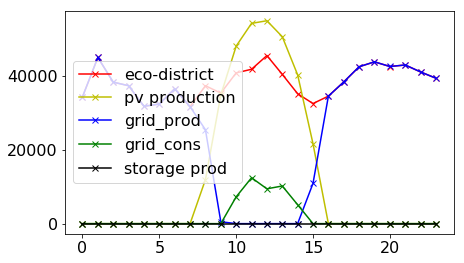

In [55]:
fig2 = plt.figure(2)
ax2 = plt.axes()
plot_quantity(time, eco_district_unit.p, fig2, ax2, color='r', label='eco-district')
plot_quantity(time, pv.p, fig2, ax2, color='y', label='pv production')
plot_quantity(time, grid_production.p, fig2, ax2, color='b', label='grid_prod')
plot_quantity(time, grid_consumption.p, fig2, ax2, color='g', label='grid_cons')
plot_quantity(time, storage.pd, fig2, ax2, color='black', label='storage prod')
ax2.legend()